In [2]:
# Calculate BMD for phase III LPR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
#util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/util"

#constance
#'''
args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
#'''

sys.path.insert(0, util_path)

In [6]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd_cal_itself/latest/phase_III/LPR/all_conc


In [7]:
# mac       - phase III - LPR - 240 timepoints - full
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/behavior/LPR/wide/full/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_full.csv'

# constance
complete_file_path = '/people/kimd999/tox/phase_III/LPR/input/wide/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_full.csv'

df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,13.011,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000


In [8]:
display(len(np.unique(df_lpr['chemical.id'])))
display(np.unique(df_lpr['chemical.id']))

df_lpr = df_lpr[df_lpr['chemical.id'].notna()]

display(len(np.unique(df_lpr['chemical.id'])))
display(np.unique(df_lpr['chemical.id']))

215

array([ 234,  275,  280,  385,  397,  443,  467,  505,  588,  595,  622,
        660,  692,  699,  725,  726,  947,  949,  955, 1016, 1017, 1031,
       1155, 1174, 1175, 1178, 1179, 1182, 1189, 1209, 1213, 1214, 1215,
       1216, 1220, 1222, 1241, 1312, 1315, 1371, 1430, 1595, 1601, 1607,
       1610, 1611, 1624, 1626, 1642, 1651, 1830, 1855, 1898, 1925, 1947,
       2076, 2090, 2110, 2151, 2180, 2192, 2240, 2323, 2358, 2585, 2587,
       2589, 2590, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2602, 2635,
       2636, 2650, 2685, 2686, 2715, 2739, 2821, 2973, 2994, 3007, 3056,
       3133, 3136, 3189, 3191, 3766, 3771, 3853, 4336, 4337, 4338, 4339,
       4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350,
       4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361,
       4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372,
       4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383,
       4384, 4385, 4386, 4387, 4388, 4390, 4391, 43

215

array([ 234,  275,  280,  385,  397,  443,  467,  505,  588,  595,  622,
        660,  692,  699,  725,  726,  947,  949,  955, 1016, 1017, 1031,
       1155, 1174, 1175, 1178, 1179, 1182, 1189, 1209, 1213, 1214, 1215,
       1216, 1220, 1222, 1241, 1312, 1315, 1371, 1430, 1595, 1601, 1607,
       1610, 1611, 1624, 1626, 1642, 1651, 1830, 1855, 1898, 1925, 1947,
       2076, 2090, 2110, 2151, 2180, 2192, 2240, 2323, 2358, 2585, 2587,
       2589, 2590, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2602, 2635,
       2636, 2650, 2685, 2686, 2715, 2739, 2821, 2973, 2994, 3007, 3056,
       3133, 3136, 3189, 3191, 3766, 3771, 3853, 4336, 4337, 4338, 4339,
       4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350,
       4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361,
       4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372,
       4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383,
       4384, 4385, 4386, 4387, 4388, 4390, 4391, 43

In [9]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
#display(np.unique(df_lpr['chemical.id']))
#display(df_lpr.head())
#display(df_lpr.tail())

215

In [10]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
#display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

501

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,13.011,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000


## Load morphological data for filtering wells that have dead fish

In [11]:
# mac       - phase III - morpho - full
#morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/morpho/full/wide/Tanguay_Phase_3_zf_morphology_data_PNNL_2021MAR23_full_w_all_endpoints.csv'

# constance
morph_data_file_complete_path = '/people/kimd999/tox/phase_III/morpho/Tanguay_Phase_3_zf_morphology_data_PNNL_2021MAR23_full_w_all_endpoints.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,725,21511,A01,725_21511_A01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,725,21511,A02,725_21511_A02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,725,21511,A03,725_21511_A03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,725,21511,A04,725_21511_A04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,725,21511,A05,725_21511_A05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


61419

In [12]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# 14 seconds took for 215 chemicals

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]

#display(df_morpho_nonna_plate_well[0:5])
print ("\n")
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) # 14 seconds took for 215 chemicals

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000,234_14389_A01
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000,234_14389_A02
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081,234_14389_A03
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000,234_14389_A04
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000,234_14389_A05




Done, it took:15.0 seconds


In [13]:
print("\ndf_lpr.shape:" + str(df_lpr.shape))

print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") 
display('df_lpr_filtered.head()',df_lpr_filtered.head())


df_lpr.shape:(44762, 246)
df_lpr_filtered.shape:(39256, 246)



'df_lpr_filtered.head()'

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000,234_14389_A01
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000,234_14389_A02
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081,234_14389_A03
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000,234_14389_A04
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000,234_14389_A05


In [14]:
# [Goal] 
# Convert time resolution to minutes (if applicable)
# For LPR, 240 timepoints -> 24 timepoints
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# -> 0.5 seconds for 1 chemical

start_time = time.time()

df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]

time_index_sec_start = 5
max_time_index_sec   = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))

print ("(before transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))

if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)

num_time_points = 0
for time_index in range(int(max_time_index_sec / group_size)):
    num_time_points += 1
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    if (report):
        print ("\ntime_index:" + str(time_index))
        print ("start_index:"  + str(start_index))
        print ("end_index:"    + str(end_index))
        
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
        # print ("df_lpr_min_in_this_time_index.shape:\n" + str(df_lpr_min_in_this_time_index.shape))
        # display(df_lpr_min_in_this_time_index.head())
        # display(df_lpr_min_in_this_time_index.tail())
        # display(df_lpr_min_in_this_time_index)
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
    
    #display(df_lpr_min.head())
    #display(df_lpr_min.tail())
    
pd.set_option('display.max_columns', None)

print ("(after  transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))

#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

cwd = os.getcwd()
print (cwd)
#df_lpr_min.to_csv("df_lpr_min.csv",index=False)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time interval is done. It took "+str(time_took))
# -> 0.5 seconds for 1 chemical

interval:1 min
(before transforming for 1 min), df_lpr_min.shape:(39256, 4)
(after  transforming for 1 min), df_lpr_min.shape:(39256, 28)
/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd_cal_itself/latest/phase_III/LPR/all_conc
Conversion of time interval is done. It took 9.1 seconds


In [15]:
display(df_lpr_min.head())
display(df_lpr_min.tail())

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,234,67.0,14389,A01,5.480000,0.000,0.000,4.158,0.000,0.000000,0.000000,0.000,0.000,12.220,0.000,0.000,9.919,0.0,0.000,59.031999,0.000000,0.986,2.021,0.000,0.00,85.125001,0.000,2.404000,234_67.0
1,234,67.0,14389,A02,33.752000,0.522,0.000,0.000,7.687,0.000000,0.609000,1.160,0.757,9.876,2.816,3.812,1.195,0.0,2.020,3.732000,3.739000,6.530,6.356,0.742,8.53,0.000000,6.738,3.389000,234_67.0
2,234,67.0,14389,A03,19.194999,91.907,42.862,44.456,77.291,76.214000,63.429001,0.835,0.000,3.158,30.556,78.792,41.188,0.0,2.041,37.662000,63.738001,74.355,1.071,0.000,0.00,26.874000,68.008,88.879999,234_67.0
3,234,67.0,14389,A04,5.473000,0.000,0.000,0.000,0.000,82.775001,21.046000,29.244,18.868,0.591,0.673,0.000,17.788,0.0,0.000,0.000000,0.759000,0.000,12.964,35.136,0.00,0.000000,0.000,39.428000,234_67.0
4,234,67.0,14389,A05,23.419000,0.000,0.000,0.000,3.371,6.509000,10.989000,2.490,1.234,0.000,5.972,1.406,1.233,0.0,0.000,1.186000,77.170000,0.000,0.199,0.000,0.00,6.510000,2.535,4.766000,234_67.0


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
44757,4457,0.410,22097,H07,20.281001,0.096,8.346,29.279000,93.608999,110.371001,3.406,0.000,0.0,75.665,117.338999,136.684001,23.838001,0.0,0.000,66.757000,90.283999,126.622998,9.891,0.189,0.280,83.872000,122.130000,146.453999,4457_0.41
44758,4457,0.140,22097,H08,7.439000,0.000,3.599,10.716000,4.383000,3.352000,14.810,11.653,0.0,0.000,0.000000,0.000000,0.399000,0.0,18.869,37.183001,6.537000,141.203000,6.530,0.995,0.188,0.406000,1.657000,171.197004,4457_0.14
44759,4457,0.046,22097,H09,57.261000,18.492,14.342,223.844001,206.533002,144.299999,21.505,0.000,0.0,152.088,124.523998,131.035000,5.737000,0.0,0.658,127.639001,113.448001,105.107001,8.427,0.142,3.350,89.187999,154.233000,132.375999,4457_0.046
44760,4457,0.015,22097,H10,53.756000,3.806,1.297,0.499000,0.000000,0.111000,0.000,0.000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.256,0.000,0.000,2.629000,0.000000,0.000000,4457_0.015
44761,4457,0.000,22097,H12,26.923999,3.282,0.153,34.236000,48.712000,19.986001,0.778,0.069,0.0,73.671,63.410000,47.490000,4.170000,0.0,0.000,78.372000,58.081000,75.798000,8.751,1.386,0.000,127.222998,98.732999,101.414000,4457_0.0


df_lpr_min.shape:(39256, 29)


39256

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,234,67.0,14389,A01,5.480000,0.000,0.000,4.158,0.000000,0.000000,0.000000,0.000,0.000,12.220000,0.000000,0.000,9.919,0.000,0.000,59.031999,0.000000,0.986000,2.021,0.000000,0.000000,85.125001,0.000,2.404000,234_67.0
1,234,67.0,14389,A02,33.752000,0.522,0.000,0.000,7.687000,0.000000,0.609000,1.160,0.757,9.876000,2.816000,3.812,1.195,0.000,2.020,3.732000,3.739000,6.530000,6.356,0.742000,8.530000,0.000000,6.738,3.389000,234_67.0
2,234,67.0,14389,A03,19.194999,91.907,42.862,44.456,77.291000,76.214000,63.429001,0.835,0.000,3.158000,30.556000,78.792,41.188,0.000,2.041,37.662000,63.738001,74.355000,1.071,0.000000,0.000000,26.874000,68.008,88.879999,234_67.0
3,234,67.0,14389,A04,5.473000,0.000,0.000,0.000,0.000000,82.775001,21.046000,29.244,18.868,0.591000,0.673000,0.000,17.788,0.000,0.000,0.000000,0.759000,0.000000,12.964,35.136000,0.000000,0.000000,0.000,39.428000,234_67.0
4,234,67.0,14389,A05,23.419000,0.000,0.000,0.000,3.371000,6.509000,10.989000,2.490,1.234,0.000000,5.972000,1.406,1.233,0.000,0.000,1.186000,77.170000,0.000000,0.199,0.000000,0.000000,6.510000,2.535,4.766000,234_67.0
5,234,67.0,14389,A06,4.681000,0.000,3.794,68.314,0.000000,19.912000,0.000000,0.443,0.000,78.051000,0.000000,4.962,4.104,0.000,7.815,136.770000,6.222000,0.000000,4.127,5.180000,0.000000,76.018000,5.728,0.362000,234_67.0
6,234,67.0,14389,A07,3.644000,0.000,0.000,0.000,0.000000,58.541999,0.000000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000000,7.960000,0.000000,0.000,0.000000,31.772999,0.000000,1.953,0.000000,234_67.0
8,234,67.0,14389,A09,25.579000,0.062,7.349,0.000,6.820000,2.153000,37.912000,14.566,17.533,107.623001,0.000000,0.000,0.000,0.655,1.881,66.423999,1.404000,0.000000,0.678,23.967001,0.633000,104.407000,0.000,36.016999,234_67.0
9,234,67.0,14389,A10,4.241000,0.000,4.482,33.031,124.051002,5.863000,0.934000,2.416,0.523,37.901000,37.434999,18.290,1.692,0.000,0.000,56.152000,18.177000,10.933000,7.399,0.239000,0.000000,34.313999,39.572,2.660000,234_67.0
10,234,67.0,14389,A11,9.044000,1.315,5.020,7.361,96.161000,82.159000,3.546000,0.000,0.503,116.806999,0.000000,96.771,24.379,15.638,26.368,90.576999,86.988999,84.646001,26.147,0.109000,2.451000,91.616000,70.654,82.532001,234_67.0


/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd_cal_itself/latest/phase_III/LPR/all_conc
Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_full_all_conc.png


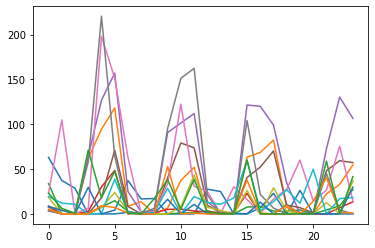

In [16]:
# Plot few lpr curves to check transition points
# all concentrations

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)

print ("df_lpr_min.shape:" + str(df_lpr_min.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (df_lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

ax.plot(np.transpose(df_lpr_min.iloc[10:23,time_index_start:time_index_start + num_time_points].values));
#ax.plot(np.transpose(df_lpr_min.iloc[:,time_index_start:time_index_start + num_time_points].values));

display(len(df_lpr_min))
display(df_lpr_min.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_all_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
#plt.savefig(output_filename, bbox_inches="tight")

In [24]:
## calculate MOV, AUC for all chemical concentrations
df_lpr_min = df_lpr_min.rename(columns={"plate.id": "Plate", "chemical.id": "Chemical.ID", "conc": "CONC", "well": "WELL"})
delta_mov_auc = df_lpr_min[['Chemical.ID', 'CONC', 'Plate', 'WELL']].copy()
#delta_mov_auc = df_lpr_min[['chemical.id', 'conc', 'plate.id', 'well']].copy()

trans_points = [2,8,14,20] # "official"

end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
#    print ("\ntrans_index:" + str(trans_index))
    print ("trans_point:" + str(trans_point))
    
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_mov_auc['MOV' + str(trans_index + 1)] = df_lpr_min['t' + str(trans_point + 1)] - df_lpr_min['t' + str(trans_point)]
        else:
            delta_mov_auc['AUC' + str(trans_index + 1)] \
            = sum(df_lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(df_lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))

#display(delta_mov_auc.head(1))
#delta.to_csv("delta_mov_auc.csv", index=False)

trans_point:2
trans_point:8
trans_point:14
trans_point:20


In [20]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()